# Data Collection

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [58]:
files =os.listdir(r'C:\Users\Shubham\Desktop\cyclistic data')

In [59]:
files

['202110-divvy-tripdata.csv',
 '202111-divvy-tripdata.csv',
 '202112-divvy-tripdata.csv',
 '202201-divvy-tripdata.csv',
 '202202-divvy-tripdata.csv',
 '202203-divvy-tripdata.csv',
 '202204-divvy-tripdata.csv',
 '202205-divvy-tripdata.csv',
 '202206-divvy-tripdata.csv',
 '202207-divvy-tripdata.csv',
 '202208-divvy-tripdata.csv',
 '202209-divvy-publictripdata.csv']

In [60]:
def read_data(path,filename):
    return pd.read_csv(path+'/'+filename)

In [61]:
path =r'C:\Users\Shubham\Desktop\cyclistic data'
sept_22 = read_data(path,'202209-divvy-publictripdata.csv')
aug_22 = read_data(path,'202208-divvy-tripdata.csv')
july_22 = read_data(path,'202207-divvy-tripdata.csv')
june_22 = read_data(path,'202206-divvy-tripdata.csv')
may_22 = read_data(path,'202205-divvy-tripdata.csv')
apr_22 = read_data(path,'202204-divvy-tripdata.csv')
mar_22 = read_data(path,'202203-divvy-tripdata.csv')
feb_22 = read_data(path,'202202-divvy-tripdata.csv')
jan_22 = read_data(path,'202201-divvy-tripdata.csv')
dec_21 = read_data(path,'202112-divvy-tripdata.csv')
nov_21 = read_data(path,'202111-divvy-tripdata.csv')
oct_21 = read_data(path,'202110-divvy-tripdata.csv')

In [62]:
#combinig the data
cyclistic_data = pd.concat([sept_22,aug_22,july_22,june_22,may_22,apr_22,mar_22,feb_22,jan_22,dec_21,nov_21,oct_21])

In [63]:
cyclistic_data.shape

(5828235, 13)

In [64]:
cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5156990AC19CA285,electric_bike,2022-09-01 08:36:22,2022-09-01 08:39:05,NaN,NaN,California Ave & Milwaukee Ave,13084,41.93,-87.69,41.922695,-87.697153,casual
1,E12D4A16BF51C274,electric_bike,2022-09-01 17:11:29,2022-09-01 17:14:45,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual
2,A02B53CD7DB72DD7,electric_bike,2022-09-01 17:15:50,2022-09-01 17:16:12,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual
3,C82E05FEE872DF11,electric_bike,2022-09-01 09:00:28,2022-09-01 09:10:32,NaN,NaN,NaN,NaN,41.93,-87.69,41.940000,-87.670000,casual
4,4DEEB4550A266AE1,electric_bike,2022-09-01 07:30:11,2022-09-01 07:32:36,NaN,NaN,NaN,NaN,41.92,-87.73,41.920000,-87.730000,casual


# Data Cleaning

In [65]:
cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5828235 entries, 0 to 631225
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 622.5+ MB


In [66]:
cyclistic_data['rideable_type']= cyclistic_data.rideable_type.astype('category')
cyclistic_data['member_casual']= cyclistic_data.member_casual.astype('category')

In [67]:
cyclistic_data.member_casual.head()

0    casual
1    casual
2    casual
3    casual
4    casual
Name: member_casual, dtype: category
Categories (2, object): ['casual', 'member']

In [68]:
cyclistic_data['started_at']= pd.to_datetime(cyclistic_data.started_at)
cyclistic_data['ended_at']= pd.to_datetime(cyclistic_data.ended_at)

In [69]:
#checking null values
cyclistic_data.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    895032
start_station_id      895032
end_station_name      958227
end_station_id        958227
start_lat                  0
start_lng                  0
end_lat                 5844
end_lng                 5844
member_casual              0
dtype: int64

In [70]:
cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5828235 entries, 0 to 631225
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(5)
memory usage: 544.7+ MB


In [71]:
#calculating ride_length
cyclistic_data['ride_length'] = cyclistic_data['ended_at'] - cyclistic_data['started_at']
cyclistic_data['ride_length']

0        0 days 00:02:43
1        0 days 00:03:16
2        0 days 00:00:22
3        0 days 00:10:04
4        0 days 00:02:25
               ...      
631221   0 days 00:22:20
631222   0 days 00:22:34
631223   0 days 00:05:33
631224   0 days 00:05:28
631225   0 days 00:25:25
Name: ride_length, Length: 5828235, dtype: timedelta64[ns]

In [72]:
# splitting and extracting the date from the 'started_at' column
cyclistic_data['start_date'] = cyclistic_data.started_at.dt.date
cyclistic_data.start_date.head()

0    2022-09-01
1    2022-09-01
2    2022-09-01
3    2022-09-01
4    2022-09-01
Name: start_date, dtype: object

In [73]:
# converting 'day_of_week' into a datetime dtype
cyclistic_data['start_date']= pd.to_datetime(cyclistic_data.start_date)
cyclistic_data.dtypes

ride_id                        object
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
ride_length           timedelta64[ns]
start_date             datetime64[ns]
dtype: object

In [74]:
# finding the weekday of the date 
cyclistic_data['day_name'] = cyclistic_data['start_date'].dt.day_name()
# changing day_name to  categorical dtype
cyclistic_data['day_name']= cyclistic_data.day_name.astype('category')
cyclistic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5828235 entries, 0 to 631225
Data columns (total 16 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       category       
 13  ride_length         timedelta64[ns]
 14  start_date          datetime64[ns] 
 15  day_name            category       
dtypes: category(3), datetime64[ns](3), float64(4), object(5), timedelta64[ns](1)
memory usage: 639.2+ MB


In [75]:
#creating columns of year and month from start_date
cyclistic_data['year'] = pd.DatetimeIndex(cyclistic_data['start_date']).year
cyclistic_data['month'] = pd.DatetimeIndex(cyclistic_data['start_date']).month

In [76]:
cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,day_name,year,month
0,5156990AC19CA285,electric_bike,2022-09-01 08:36:22,2022-09-01 08:39:05,NaN,NaN,California Ave & Milwaukee Ave,13084,41.93,-87.69,41.922695,-87.697153,casual,0 days 00:02:43,2022-09-01,Thursday,2022,9
1,E12D4A16BF51C274,electric_bike,2022-09-01 17:11:29,2022-09-01 17:14:45,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual,0 days 00:03:16,2022-09-01,Thursday,2022,9
2,A02B53CD7DB72DD7,electric_bike,2022-09-01 17:15:50,2022-09-01 17:16:12,NaN,NaN,NaN,NaN,41.87,-87.62,41.870000,-87.620000,casual,0 days 00:00:22,2022-09-01,Thursday,2022,9
3,C82E05FEE872DF11,electric_bike,2022-09-01 09:00:28,2022-09-01 09:10:32,NaN,NaN,NaN,NaN,41.93,-87.69,41.940000,-87.670000,casual,0 days 00:10:04,2022-09-01,Thursday,2022,9
4,4DEEB4550A266AE1,electric_bike,2022-09-01 07:30:11,2022-09-01 07:32:36,NaN,NaN,NaN,NaN,41.92,-87.73,41.920000,-87.730000,casual,0 days 00:02:25,2022-09-01,Thursday,2022,9


In [77]:
#sorting the dataset
cyclistic_data.sort_values(by=['started_at'], inplace= True, ascending= True)

In [78]:
#droping rows with na values
cyclistic_data.dropna(inplace= True)


In [79]:
cyclistic_data.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,start_date,day_name,year,month
271143,ABA2BDC3595FC3E9,classic_bike,2021-10-01 00:00:09,2021-10-01 00:10:12,Morgan St & Lake St,TA1306000015,Noble St & Milwaukee Ave,13290,41.885483,-87.652305,41.900680,-87.662600,casual,0 days 00:10:03,2021-10-01,Friday,2021,10
117528,0BE9C131A5705D92,classic_bike,2021-10-01 00:00:16,2021-10-01 00:05:29,Damen Ave & Cortland St,13133,Winchester Ave & Elston Ave,KA1504000140,41.915983,-87.677335,41.924091,-87.676460,casual,0 days 00:05:13,2021-10-01,Friday,2021,10
341788,74483AC18C8C6B90,classic_bike,2021-10-01 00:00:18,2021-10-01 00:08:52,Halsted St & Roscoe St,TA1309000025,Greenview Ave & Diversey Pkwy,13294,41.943670,-87.648950,41.932590,-87.665936,casual,0 days 00:08:34,2021-10-01,Friday,2021,10
200504,F8DBF095F01E1B68,classic_bike,2021-10-01 00:02:22,2021-10-01 00:06:40,Pine Grove Ave & Irving Park Rd,TA1308000022,Clarendon Ave & Junior Ter,13389,41.954383,-87.648043,41.961004,-87.649603,member,0 days 00:04:18,2021-10-01,Friday,2021,10
21249,B0B9EB7622461EF4,classic_bike,2021-10-01 00:02:27,2021-10-01 00:17:56,MLK Jr Dr & 29th St,TA1307000139,Clinton St & Roosevelt Rd,WL-008,41.842052,-87.617000,41.867118,-87.641088,member,0 days 00:15:29,2021-10-01,Friday,2021,10


In [80]:
# check for null values in the dataset
cyclistic_data.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
start_date            0
day_name              0
year                  0
month                 0
dtype: int64

In [81]:
# dropping the (start_lng, end_lat) and(start_lat, end_lat) columns from the dataset
cyclistic_data. drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1, inplace=True) 

In [82]:
cyclistic_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,start_date,day_name,year,month
271143,ABA2BDC3595FC3E9,classic_bike,2021-10-01 00:00:09,2021-10-01 00:10:12,Morgan St & Lake St,TA1306000015,Noble St & Milwaukee Ave,13290,casual,0 days 00:10:03,2021-10-01,Friday,2021,10
117528,0BE9C131A5705D92,classic_bike,2021-10-01 00:00:16,2021-10-01 00:05:29,Damen Ave & Cortland St,13133,Winchester Ave & Elston Ave,KA1504000140,casual,0 days 00:05:13,2021-10-01,Friday,2021,10
341788,74483AC18C8C6B90,classic_bike,2021-10-01 00:00:18,2021-10-01 00:08:52,Halsted St & Roscoe St,TA1309000025,Greenview Ave & Diversey Pkwy,13294,casual,0 days 00:08:34,2021-10-01,Friday,2021,10
200504,F8DBF095F01E1B68,classic_bike,2021-10-01 00:02:22,2021-10-01 00:06:40,Pine Grove Ave & Irving Park Rd,TA1308000022,Clarendon Ave & Junior Ter,13389,member,0 days 00:04:18,2021-10-01,Friday,2021,10
21249,B0B9EB7622461EF4,classic_bike,2021-10-01 00:02:27,2021-10-01 00:17:56,MLK Jr Dr & 29th St,TA1307000139,Clinton St & Roosevelt Rd,WL-008,member,0 days 00:15:29,2021-10-01,Friday,2021,10


In [83]:
# check for any duplicated values
cyclistic_data.duplicated().any()

False

# EDA

In [84]:
# calculate the mean of ride length of all types of users
cyclistic_data.ride_length.describe()

count                      4474141
mean     0 days 00:17:30.354210562
std      0 days 01:04:40.571485334
min              -1 days +21:50:55
25%                0 days 00:06:10
50%                0 days 00:10:47
75%                0 days 00:19:20
max               28 days 06:25:01
Name: ride_length, dtype: object

In [85]:
#filtering the values
minus_data= cyclistic_data['ride_length'] < '00:00:00'

In [86]:
cyclistic_data[minus_data].count()

ride_id               72
rideable_type         72
started_at            72
ended_at              72
start_station_name    72
start_station_id      72
end_station_name      72
end_station_id        72
member_casual         72
ride_length           72
start_date            72
day_name              72
year                  72
month                 72
dtype: int64

In [87]:
cyclistic_data.drop(cyclistic_data[minus_data].index, inplace=True)

In [88]:
#calclating ride_lemgth of members(only)
member_filter = cyclistic_data['member_casual'] == 'member'
cyclistic_data[member_filter].count()
cyclistic_data[member_filter].ride_length.describe()

count                      2667840
mean     0 days 00:12:28.985457898
std      0 days 00:18:12.701342082
min                0 days 00:00:00
25%                0 days 00:05:19
50%                0 days 00:09:03
75%                0 days 00:15:28
max                1 days 00:52:55
Name: ride_length, dtype: object

In [89]:
casual_filter = cyclistic_data['member_casual'] == 'casual'
cyclistic_data[casual_filter].count()
cyclistic_data[casual_filter].ride_length.describe()

count                      1805763
mean     0 days 00:24:55.718561627
std      0 days 01:38:54.140131710
min                0 days 00:00:00
25%                0 days 00:08:10
50%                0 days 00:14:16
75%                0 days 00:26:27
max               28 days 06:25:01
Name: ride_length, dtype: object

In [90]:
#another method for calculating casual riders
cyclistic_data[~member_filter].ride_length.describe()


count                      1805763
mean     0 days 00:24:55.718561627
std      0 days 01:38:54.140131710
min                0 days 00:00:00
25%                0 days 00:08:10
50%                0 days 00:14:16
75%                0 days 00:26:27
max               28 days 06:25:01
Name: ride_length, dtype: object

# Visualization


In [106]:
# calculate the no. of rides by users in a week by adding Count of ride_id to values
count_users = cyclistic_data.groupby('day_name')['ride_id'].count()
count_users = count_users.sort_index()
count_users

day_name
Friday       636985
Monday       583272
Saturday     739087
Sunday       616378
Thursday     637122
Tuesday      631266
Wednesday    629493
Name: ride_id, dtype: int64

In [107]:
# calculate the no. of rides by members in a week
count_members = cyclistic_data[cyclistic_data['member_casual'] == 'member'].groupby('day_name')['ride_id'].count()
count_members

day_name
Friday       377392
Monday       373255
Saturday     350944
Sunday       302494
Thursday     412182
Tuesday      428382
Wednesday    423191
Name: ride_id, dtype: int64

In [108]:
# calculate the no. of rides by members in a week
count_casuals = cyclistic_data[cyclistic_data['member_casual'] == 'casual'].groupby('day_name')['ride_id'].count()
count_casuals

day_name
Friday       259593
Monday       210017
Saturday     388143
Sunday       313884
Thursday     224940
Tuesday      202884
Wednesday    206302
Name: ride_id, dtype: int64

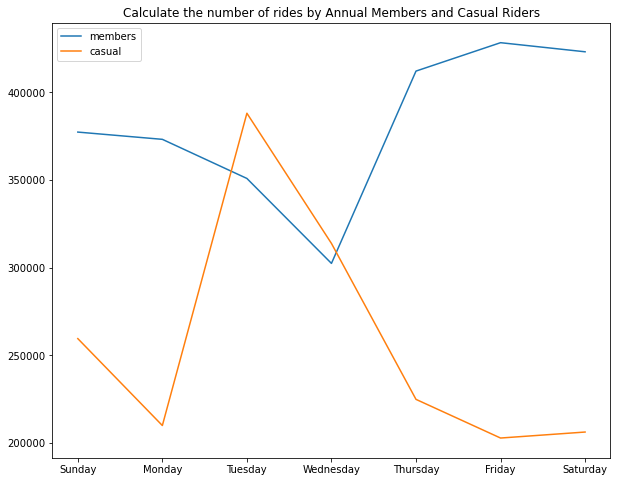

In [109]:
plt.figure(figsize = (10,8))
plt.plot(count_members.index, count_members.values)
plt.plot(count_casuals.index, count_casuals.values)
plt.title('Calculate the number of rides by Annual Members and Casual Riders')
plt.legend(['members', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(count_casuals.index, labels)
plt.show()

In [110]:
# check the number of users in each type over the past 12 months
user_types = cyclistic_data['member_casual'].value_counts()
user_types

member    2667840
casual    1805763
Name: member_casual, dtype: int64

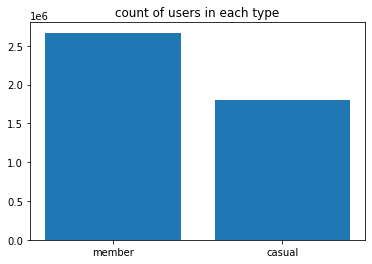

In [111]:
# to plot the bar chart of the number of users in each type over the past 12 months

plt.title('count of users in each type')
plt.bar(user_types.index, user_types.values)
plt.show()